# Random Forest
Разбор статьи: https://pythonru.com/uroki/sklearn-random-forest

In [1]:
from sklearn import datasets

# загрузка датасета
iris = datasets.load_iris()

In [2]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
import pandas as pd

data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [10]:
clf.predict([[3, 5, 4, 2]])

array([2])

**Поиск важных признаков с помощью scikit-learn**

In [14]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

feature_imp

petal width (cm)     0.466818
petal length (cm)    0.442598
sepal length (cm)    0.065264
sepal width (cm)     0.025321
dtype: float64

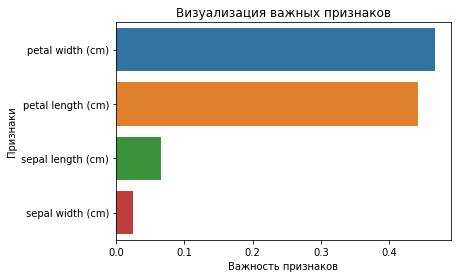

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [17]:
X = data[['petal length', 'petal width','sepal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=85)

In [18]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9619047619047619
